# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [4]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end = end_date,
    limit = 1000
   
).df

ticker_data.head()

TSLA                                    
                              open    high       low   close    volume
time                                                                  
2017-05-04 00:00:00-04:00  307.435  307.77  290.7601  295.36  11653966
2017-05-05 00:00:00-04:00  298.000  308.55  296.8000  308.35   6695227
2017-05-08 00:00:00-04:00  310.600  313.79  305.8200  307.20   5969091
2017-05-09 00:00:00-04:00  309.380  321.99  309.1000  321.27   8158739
2017-05-10 00:00:00-04:00  321.560  325.40  318.1200  325.22   4754047

### Run the Monte Carlo Simulation

In [5]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [6]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000332,0.983127,1.005210,0.949474,1.022707,0.991002,1.067322,1.013148,1.014404,0.987346,...,0.997145,1.033530,1.008061,0.954317,0.984026,0.996752,1.019195,1.003678,1.007703,1.003584
2,1.018926,1.010411,1.028568,0.905632,1.062277,0.972241,1.091127,0.979011,1.049476,0.975219,...,0.984916,1.026561,1.075989,0.952713,0.985302,1.063958,1.035883,1.054570,1.051903,0.960487
3,0.975710,0.990390,1.027463,0.942036,1.042511,0.968927,1.086403,0.952369,1.056986,0.953629,...,0.933418,0.975695,1.054709,0.994838,1.030577,1.129821,1.069723,1.120178,0.998826,0.968076
4,0.963660,0.949105,1.066342,0.989110,1.051438,1.015858,1.129266,0.937458,1.086936,0.985726,...,0.928450,0.939938,1.056233,1.040023,1.035540,1.106303,1.050939,1.162556,1.022725,1.005487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2.167358,0.549169,1.943206,5.286630,1.588754,2.362541,2.539079,0.992996,5.883390,0.910510,...,1.286928,1.940670,5.414150,2.173582,16.847329,28.834804,9.420700,25.238799,1.038462,1.266807
753,2.205085,0.545433,1.969023,5.289924,1.592145,2.308526,2.530508,0.929229,5.436709,0.895823,...,1.215503,2.103183,5.216453,2.137348,17.363114,29.577232,9.387408,24.888518,1.080391,1.313292
754,2.187289,0.575681,1.895799,5.511724,1.529544,2.334288,2.410471,0.948506,5.172487,0.845845,...,1.179592,2.086228,4.829015,2.064331,16.789488,28.418851,9.529138,23.990006,1.069880,1.342148
755,2.106607,0.539359,2.031530,5.653718,1.440894,2.341765,2.346284,0.946438,5.006721,0.866025,...,1.171626,2.162111,4.898065,2.079830,17.428159,29.473246,9.516995,24.767650,0.986787,1.267036


### Plot the Simulated Daily Returns Trajectory for `TSLA` over the Next Year (252 Trading Days)

In [7]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    'mean' : list(MC_TSLA.simulated_return.mean(axis=1)),
    'median' : list(MC_TSLA.simulated_return.median(axis=1)),
    'min' : list(MC_TSLA.simulated_return.min(axis=1)),
    'max' : list(MC_TSLA.simulated_return.max(axis=1))
}
# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001968,1.002012,0.874788,1.109538
2,1.004797,1.005689,0.797323,1.183952
3,1.007833,1.008614,0.786602,1.223386
4,1.011754,1.010498,0.759033,1.302500


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of TSLA Stock Over the Next Year'}>

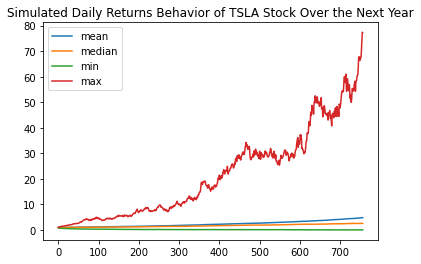

In [8]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of TSLA Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [9]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10019.680739,10020.124756,8747.884506,11095.382930
2,10047.966847,10056.889338,7973.229666,11839.515121
3,10078.325786,10086.136670,7866.019795,12233.862188
4,10117.544514,10104.980633,7590.325420,13025.003549


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of TSLA Stock Over the Next Year'}>

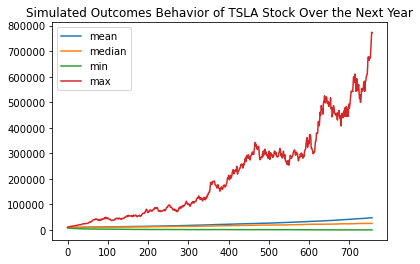

In [10]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               4.832570
std                7.012558
min                0.066738
25%                1.326076
50%                2.628226
75%                5.319576
max               77.203388
95% CI Lower       0.296630
95% CI Upper      23.106892
Name: 756, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $2966.3 and $231068.92.
